# Dataset Information
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

# Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index dteday : date season : season (1:winter, 2:spring, 3:summer, 4:fall) yr : year (0: 2011, 1:2012) mnth : month ( 1 to 12) hr : hour (0 to 23) holiday : weather day is holiday or not (extracted from [Web Link]) weekday : day of the week workingday : if day is neither weekend nor holiday is 1, otherwise is 0. weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) hum: Normalized humidity. The values are divided to 100 (max) windspeed: Normalized wind speed. The values are divided to 67 (max) casual: count of casual users registered: count of registered users cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize': [15,4]}, font_scale=1.5)

# Data Preprocessing

In [2]:
df1 = pd.read_csv('./hour.csv')
df1.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df2 = pd.read_csv('./day.csv')
df2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# concatenate the two dataframes vertically
result = pd.concat([df1, df2], axis=0)


In [5]:
# data type info
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.5+ MB


- hr -> attribute has null values 
- dteday -> need to be datetime 
- {'hr':'hour','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}
- casual,registered: unneeded 

In [6]:
# statistical info
result.describe()

instant        season            yr          mnth            hr  \
count  18110.000000  18110.000000  18110.000000  18110.000000  17379.000000   
mean    8354.006405      2.501436      0.502485      6.537051     11.546752   
std     5180.771860      1.107045      0.500008      3.439213      6.914405   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      6.000000   
50%     8324.500000      3.000000      1.000000      7.000000     12.000000   
75%    12851.750000      3.000000      1.000000     10.000000     18.000000   
max    17379.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       0.028769      3.003424      0.682772      1.424075      0.496922   
std        0.167160      2.005677      0.465410      0.635830      0.192177   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       0.475718      0.627256      0.190113     68.472336    295.158697   
std        0.171496      0.191147      0.120851    216.588054    771.555142   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     37.000000   
50%        0.484800      0.630000      0.188951     18.000000    123.000000   
75%        0.621200      0.780000      0.253700     55.000000    238.000000   
max        1.000000      1.000000      0.850700   3410.000000   6946.000000   

                cnt  
count  18110.000000  
mean     363.631033  
std      950.827954  
min        1.000000  
25%       43.000000  
50%      152.000000  
75%      305.000000  
max     8714.000000

## Data Cleaning

In [7]:
# check for null values
result.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

as we can see .. hour attribute has 731 null value

In [8]:
# to check the percentage of the null value

(result.isna().sum())/(result.shape[0])

instant       0.000000
dteday        0.000000
season        0.000000
yr            0.000000
mnth          0.000000
hr            0.040364
holiday       0.000000
weekday       0.000000
workingday    0.000000
weathersit    0.000000
temp          0.000000
atemp         0.000000
hum           0.000000
windspeed     0.000000
casual        0.000000
registered    0.000000
cnt           0.000000
dtype: float64

it is very low as we can see here, so we can drop them with no problems.

In [9]:
copy_result = result.dropna()

# now we can work on the copy_result data frame

In [10]:
# renaming some attributes:

copy_result = copy_result.rename(columns = {'yr':'year',
                          'mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'weathersit':'weather',
                          'cnt':'count'})
copy_result.head()

instant      dteday  season  year  month  hour  holiday  weekday  \
0        1  2011-01-01       1     0      1   0.0        0        6   
1        2  2011-01-01       1     0      1   1.0        0        6   
2        3  2011-01-01       1     0      1   2.0        0        6   
3        4  2011-01-01       1     0      1   3.0        0        6   
4        5  2011-01-01       1     0      1   4.0        0        6   

   workingday  weather  temp   atemp  humidity  windspeed  casual  registered  \
0           0        1  0.24  0.2879      0.81        0.0       3          13   
1           0        1  0.22  0.2727      0.80        0.0       8          32   
2           0        1  0.22  0.2727      0.80        0.0       5          27   
3           0        1  0.24  0.2879      0.75        0.0       3          10   
4           0        1  0.24  0.2879      0.75        0.0       0           1   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

In [11]:
# dropping some attributes that we don't need 


# copy_result = copy_result.drop(columns=['instant','dteday','year'])
copy_result = copy_result.drop(columns=['instant'])

In [12]:
# change int columns to category types

cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    copy_result[col] = copy_result[col].astype('object')
    
# to check the changes
copy_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   year        17379 non-null  int64  
 3   month       17379 non-null  object 
 4   hour        17379 non-null  object 
 5   holiday     17379 non-null  object 
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  object 
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  humidity    17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  count       17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.3+ MB


In [13]:
#  now lets change the dteday to datetime

copy_result['dteday']=pd.to_datetime(copy_result['dteday'])

In [14]:
#  to split year/month/day/dayofweek/hour

def split_datetime(df):
    df['year']=df['dteday'].apply(lambda t:t.year)
    df['month']=df['dteday'].apply(lambda t:t.month)    
    df['day']=df['dteday'].apply(lambda t:t.day)    
    df['dayofweek']=df['dteday'].apply(lambda t:t.dayofweek)
    df['hours']=df['dteday'].apply(lambda t:t.hour)
    df=df.drop(['dteday'],axis=1)
    return df


# now we use our function...

copy_result=split_datetime(copy_result)
copy_result.sample(2)

season  year  month hour holiday  weekday workingday weather  temp  \
16233      4  2012     11  3.0       0        3          1       1  0.24   
9586       1  2012      2  9.0       0        4          1       1  0.20   

        atemp  humidity  windspeed  casual  registered  count  day  dayofweek  \
16233  0.2273      0.65     0.2239       0           5      5   14          2   
9586   0.1970      0.59     0.2239       9         229    238    9          3   

       hours  
16233      0  
9586       0

In [15]:
# # because count column is equal to sum of casual and registered cols, so we will drop them 
# copy_result=copy_result.drop(['casual','registered'],axis=1)

In [16]:
copy_result.duplicated().sum()

0

- no duplicated data

# Exploratory Data Analysis

#  1.Uni Varient:

## Q1.We want to check the distribution of the numerical data in the dataset.

In [17]:
# Histograms for numerical data
def hist(numCol):
    fig = plt.figure()
    sns.histplot(copy_result[numCol])
    plt.show()

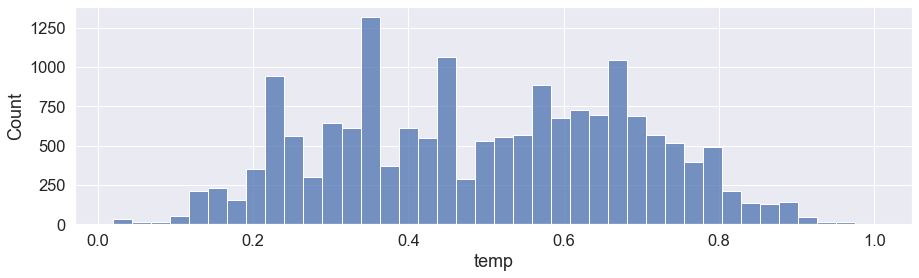

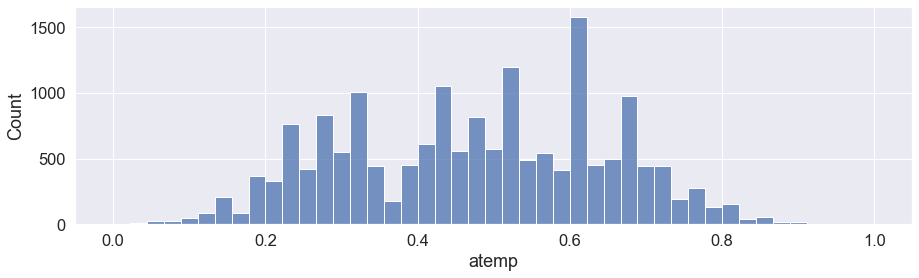

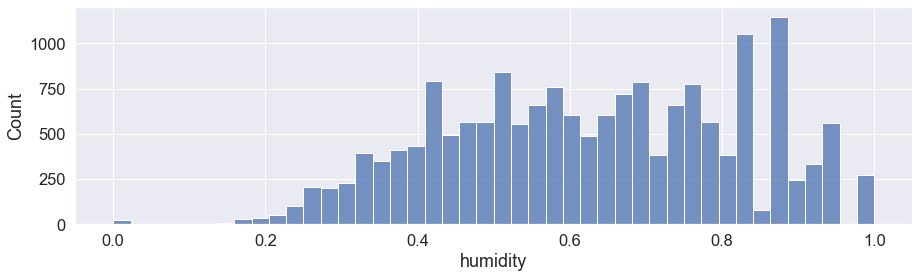

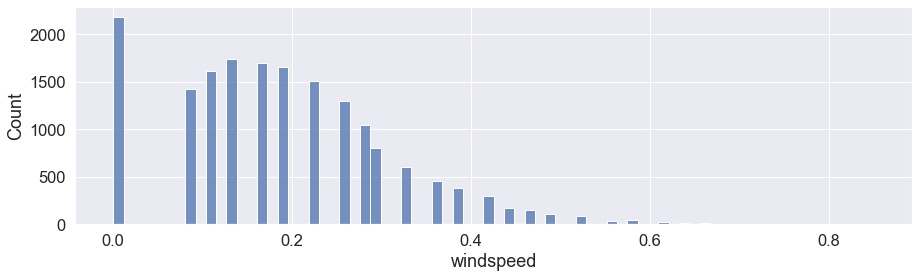

In [18]:
numCols = ['temp','atemp','humidity','windspeed']
for col in numCols:
    hist(col)

- temp/count: bike rental was at its max value when the temp was equal to 0.3
- atemp/count: bike rental was at its max value when the atemp was equal to 0.6
- humidity/count: bike rental was at its max value when the humidity was equal to 0.9
- windspeed/count: bike rental was at its max value when the windspeed was equal to 0.0

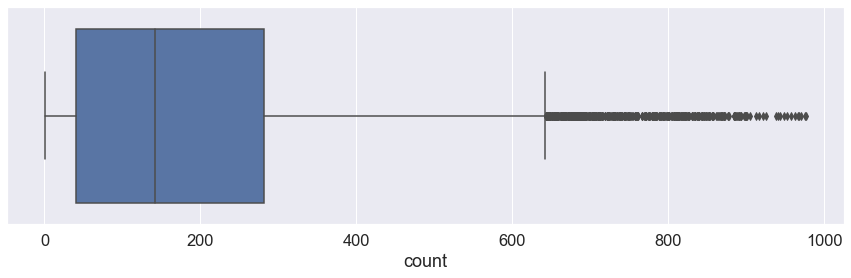

In [19]:
# Boxplot of count

sns.boxplot(data=copy_result,x='count')
plt.show()

From the boxplot of count column, it is clearly visible that most of the data lies between 30 to 300 and a huge numbers of outliers are present in the plot.

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

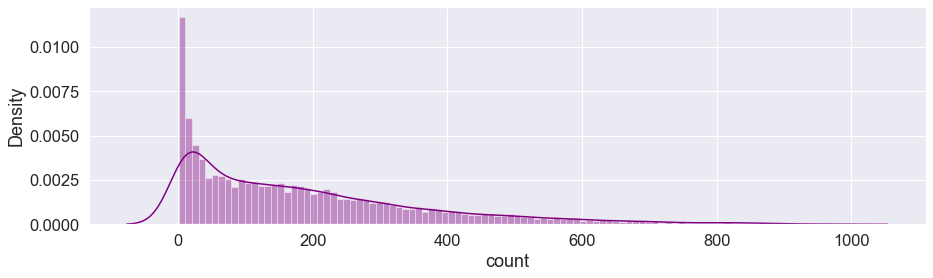

In [20]:
# Histogram of count
sns.set_style('darkgrid')
sns.distplot(copy_result['count'],bins=100,color='purple')

from the graph it is shown that the count data is skewed at the left side. the density of values is more between 0 and 200.

['weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
['humidity', 'windspeed', 'casual', 'registered']


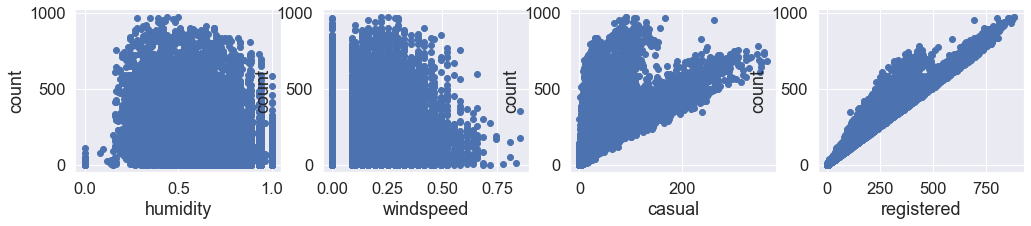

In [21]:
# Scatter plot between count & each numeric features
fields =[f for f in copy_result]
fields = fields[5:-3]
print(fields)


print(fields[5:9])
fig = plt.figure(figsize=(17,3))

for i,f in enumerate(fields[5:9]):
    ax=fig.add_subplot(1,4,i+1)
    ax.scatter(copy_result[f],copy_result['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
plt.show()

In [22]:
# # Boxplot between count & each categorical features

# fig,axes = plt.subplots(nrows=2,ncols=2)
# fig.set_size_inches(20,10)

# sns.boxplot(data=copy_result,x='season',y='count',ax=axes[0][0])
# sns.boxplot(data=copy_result,x='holiday',y='count',ax=axes[0][1])
# sns.boxplot(data=copy_result,x='workingday',y='count',ax=axes[1][0])
# sns.boxplot(data=copy_result,x='weather',y='count',ax=axes[1][1])

# axes[0][0].set(xlabel='season',ylabel='count')
# axes[0][1].set(xlabel='holiday',ylabel='count')
# axes[1][0].set(xlabel='workingday',ylabel='count')
# axes[1][1].set(xlabel='weather',ylabel='count')

# Q2.Relation between categorical values and count, the most and the least values 

In [23]:
def countPlot_count(catCol):
    fig = plt.figure()
    sns.countplot(copy_result[catCol])
    plt.show()

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


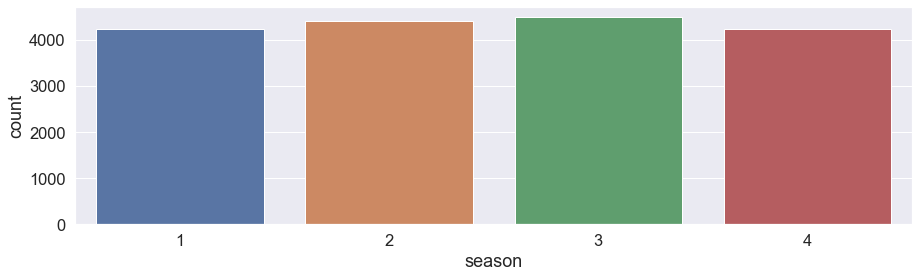

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


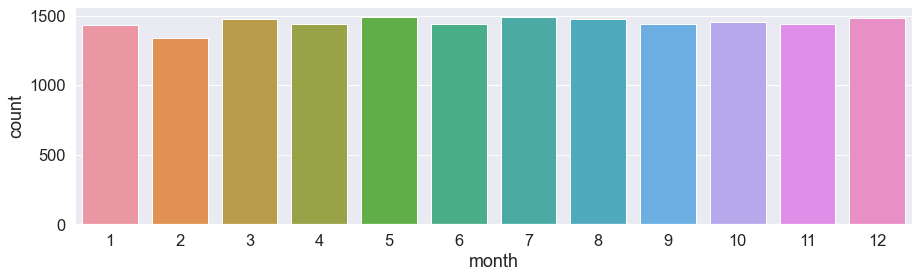

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


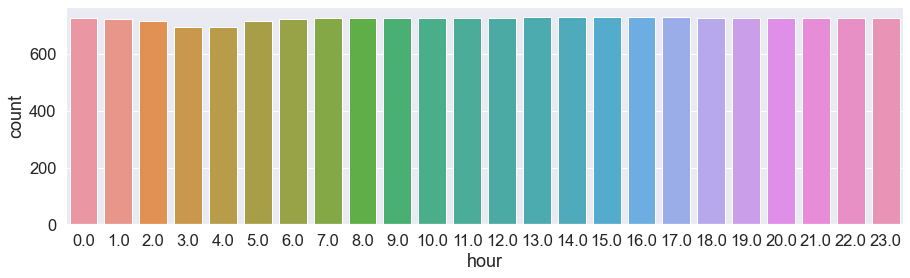

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


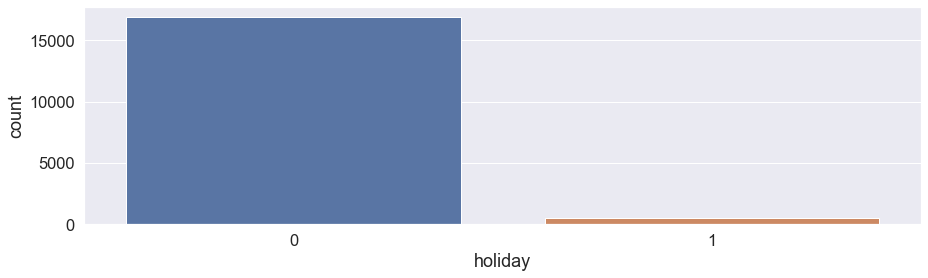

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


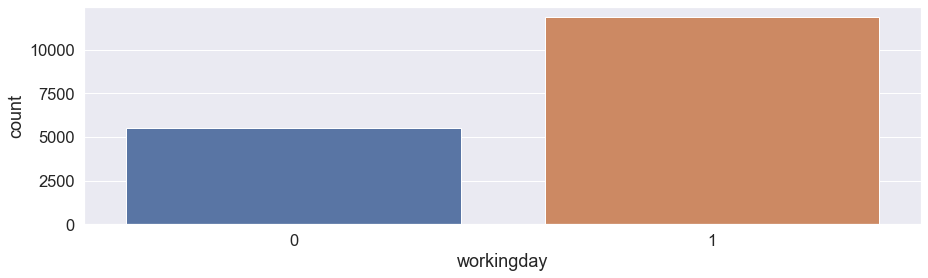

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


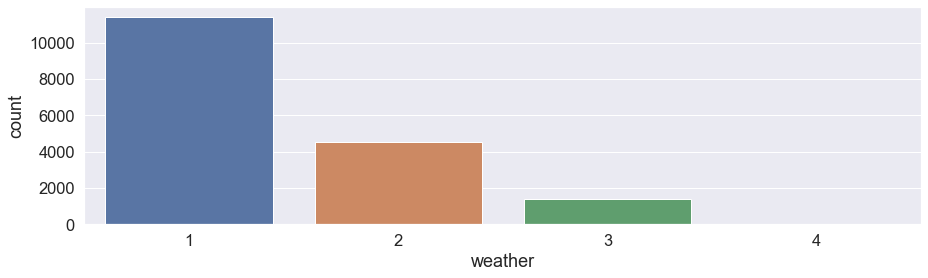

In [24]:
categoricalcols=['season','month','hour','holiday','workingday','weather']
for col in categoricalcols:
    countPlot_count(col)

- season 3 has most bike counts & season 4 has least counts
- months 5,7 has the most bike counts & month 2 has least counts
- hour 14 hasmost bike counts & hour 4 has least counts
- when there is no holiday most bike counts & holidays has least counts
- when there is workingday most bike counts & no workingday has least counts
- when there is weather 1 most bike counts & weather 4 has least counts

# 2.Bivariant:

#  Q3.What is the average count for each year?

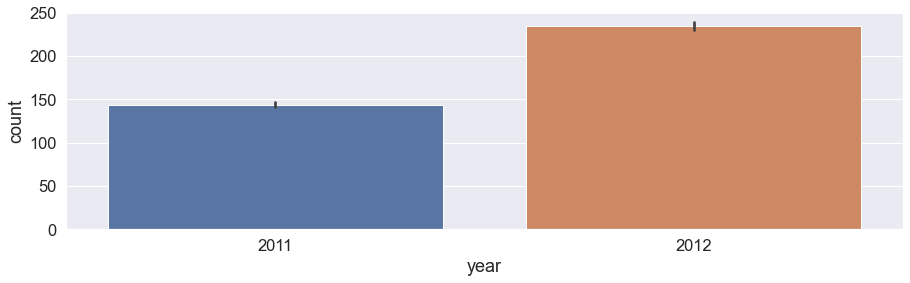

In [25]:
# barplot between year count

sns.barplot(data=copy_result,x='year',y='count', estimator=np.mean)
plt.show()

- average in year 2012 was higher than average in 2011

# Q4.What is the average count for each month?

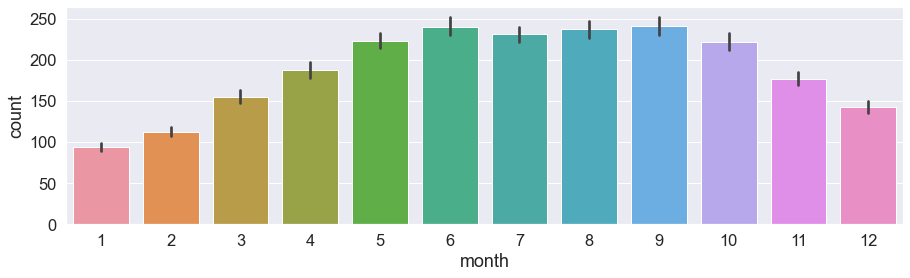

In [26]:
# barplot between month count

sns.barplot(data=copy_result,x='month',y='count',estimator=np.mean)
plt.show()

- average in month 6 was the highest, & than average in month 1 was the lowest.

# Q5.How did the humidity and temp affect number of users?

[Text(0.5, 1.0, 'Relation between humidity and users')]

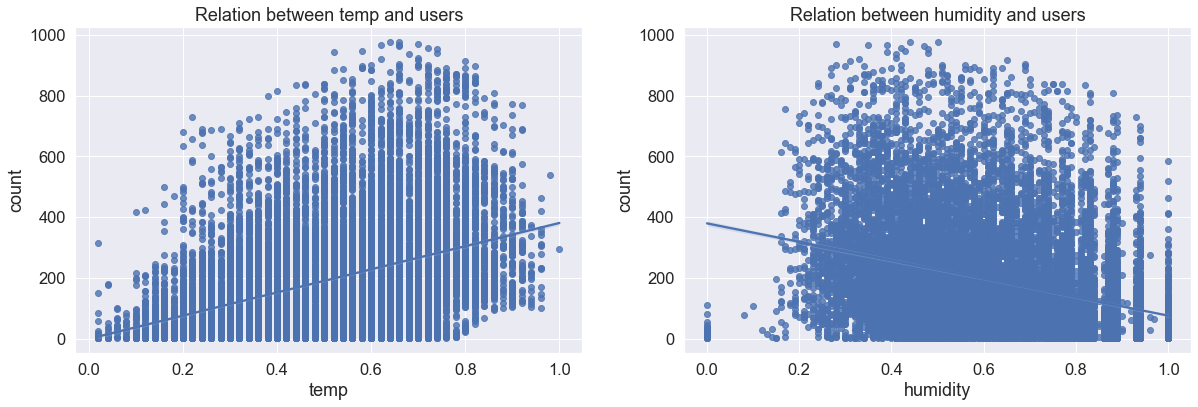

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=copy_result['temp'],y=copy_result['count'],ax=ax1)
ax1.set(title='Relation between temp and users')
sns.regplot(x=copy_result['humidity'],y=copy_result['count'],ax=ax2)
ax2.set(title='Relation between humidity and users')

When humidity increases, users decreases when temp increases, users increases

# 3.Multivarient:

# Q6.What is the most count of bikes shared for each hour accourding to week days?

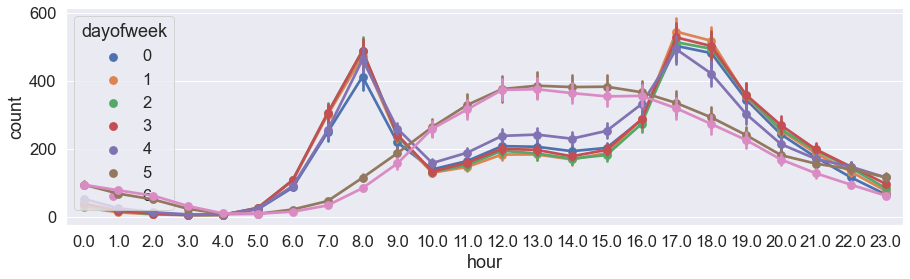

In [28]:
# pointplot between hour and count

sns.pointplot(data=copy_result,x='hour',y='count',hue='dayofweek')
plt.show()

- count of bikes was at its most at 17:00 during Sunday

# Q7.How many bikes shared during weekdays and weekends?

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

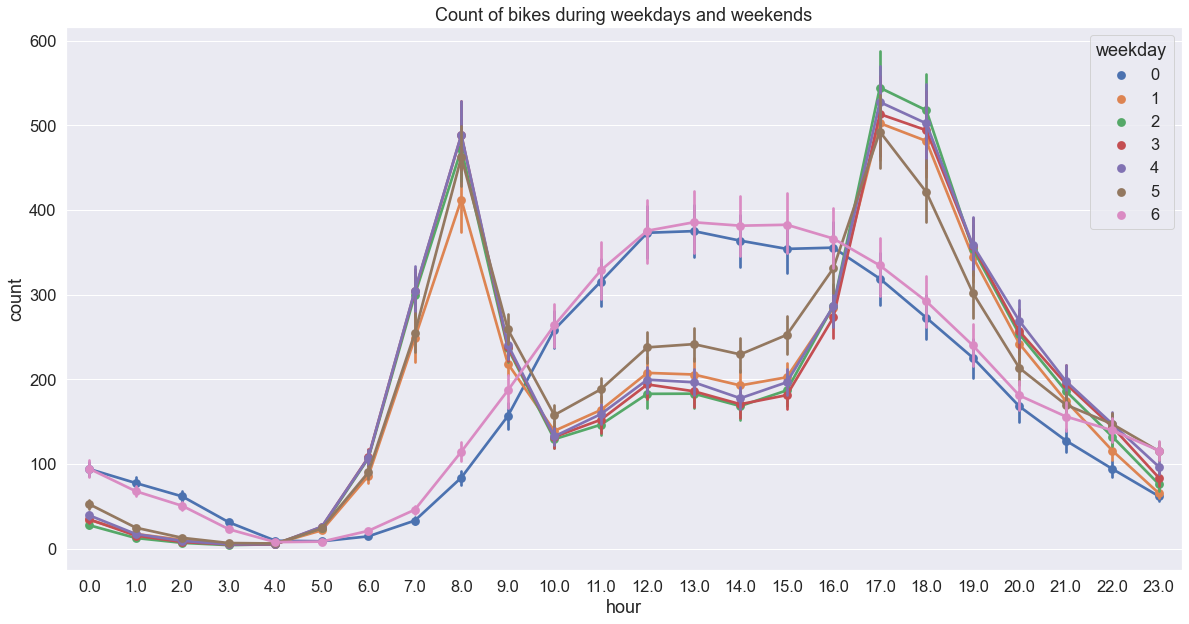

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

# Q8.How many shared bikes during weekdays and weekends: Unregistered users?

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: unregistered users')]

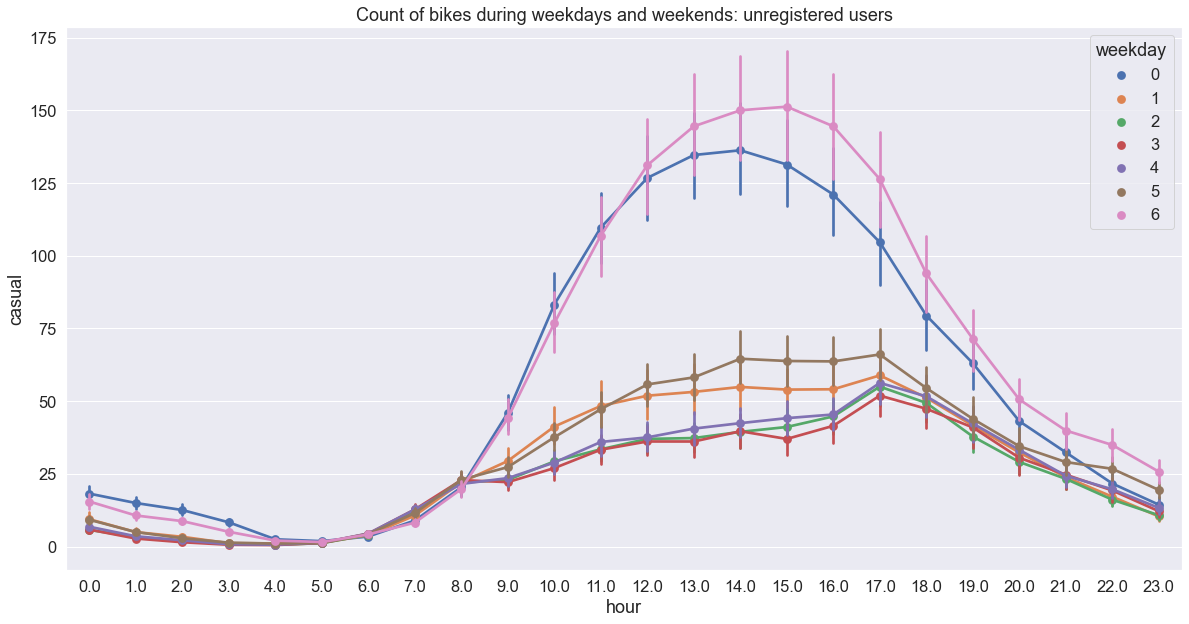

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: unregistered users')

# Q9.What is the Count of bikes during weekd/ays and weekends: Registered users?

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: registered users')]

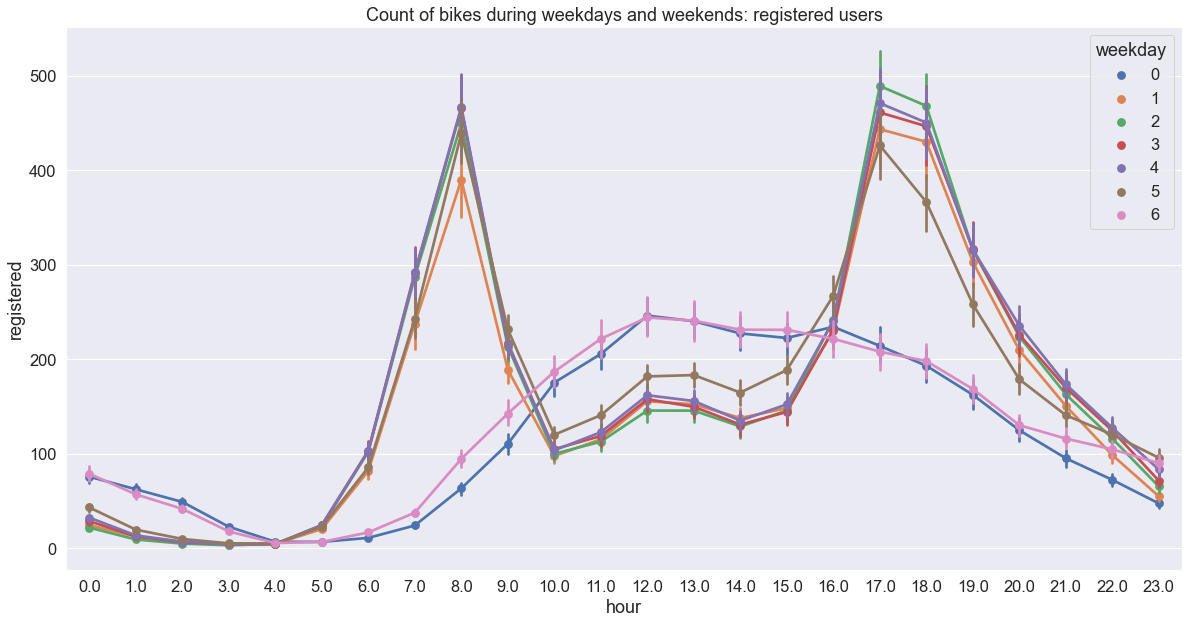

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: registered users')

# Q10.What is the Count of bikes during different weathers??

[Text(0.5, 1.0, 'Count of bikes during weather')]

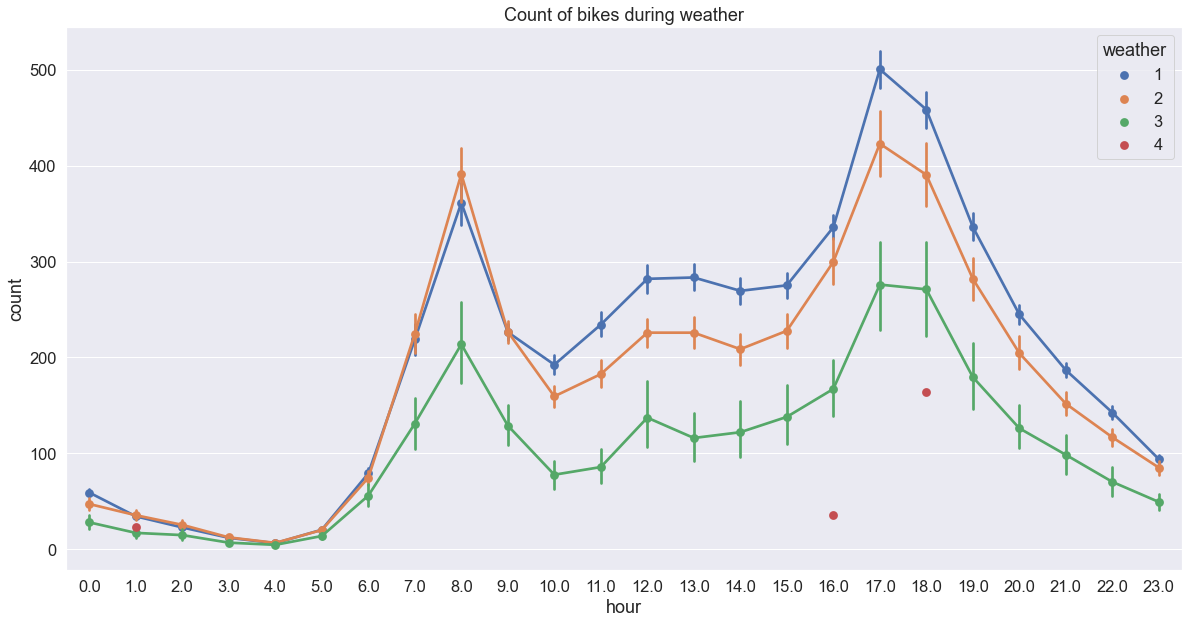

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='Count of bikes during weather')

=> so here we have 4 different typs of weather at 4:00 pm and 6:00 pm => we have less numbers of users that are most likely in heavy rain weather

-> green graph is most likely for cloudy or shower rain

# Q11.What is the Count of bikes during different seasons?

[Text(0.5, 1.0, 'Count of bikes during seasons')]

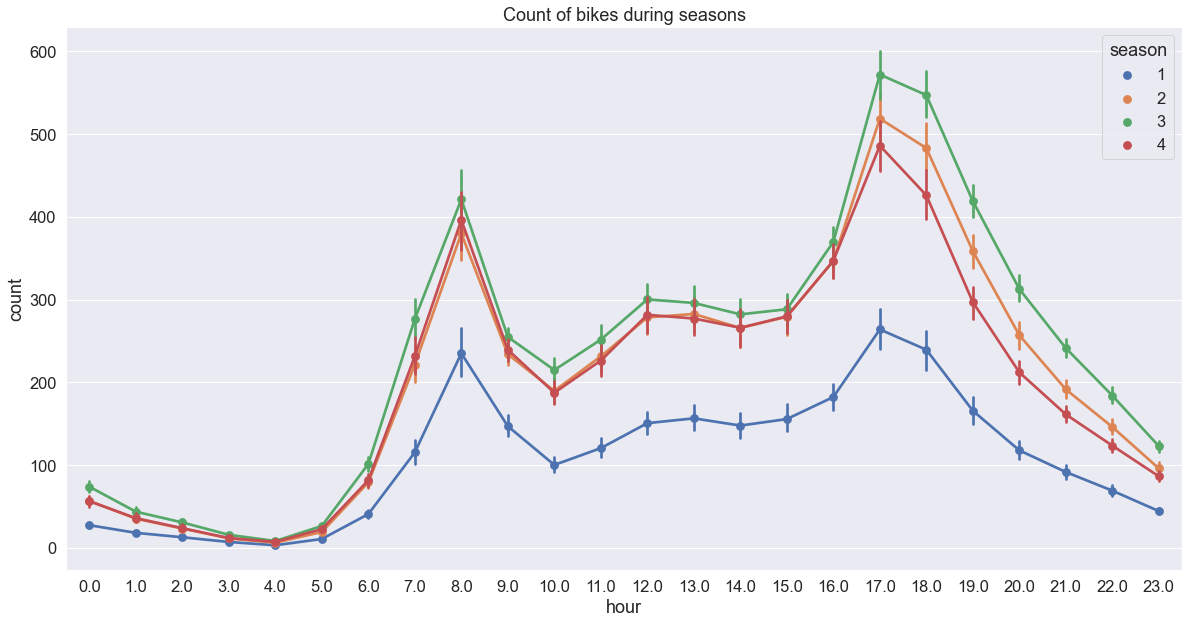

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during seasons')

we have here 4 numbers of seasons only one of them is lower at bike counts
'blue graph' => might be winter

In [34]:
fig = px.scatter(copy_result, x="hour", y="count", color="season",
                 size='count',
#                  symbol="count",
                 title="Count of bikes during seasons",
                )

fig.show()

In [35]:
fig = px.line(copy_result, x="hour", y="count", color="season" , markers=True)
fig.show()

# Q12.How many bikes shared during different months?

[Text(0.5, 1.0, 'Count of bikes during months')]

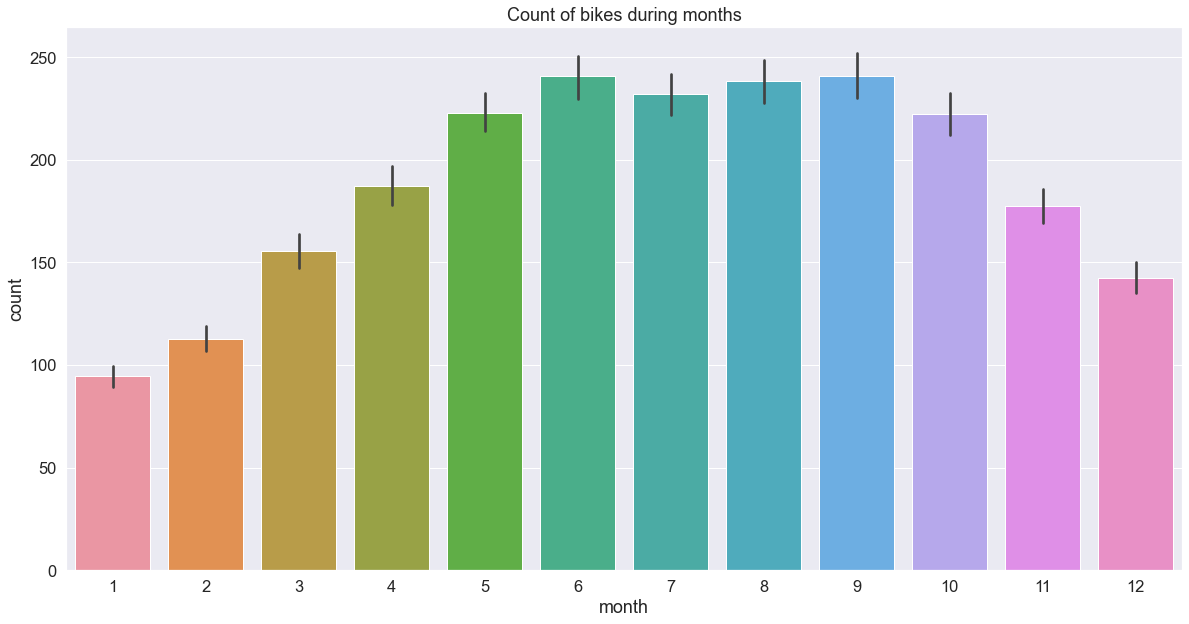

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=copy_result,x='month',y='count',ax=ax)
ax.set(title='Count of bikes during months')

In [52]:
hmada = copy_result.groupby(['month','season'])['count'].count().reset_index()
hmada

month  season  count
0       1       1   1429
1       2       1   1341
2       3       1    949
3       3       2    524
4       4       2   1437
5       5       2   1488
6       6       2    960
7       6       3    480
8       7       3   1488
9       8       3   1475
10      9       3   1053
11      9       4    384
12     10       4   1451
13     11       4   1437
14     12       1    523
15     12       4    960

In [57]:
fig = px.bar(hmada,x='month',y='count', color='season')
fig.show()

# Q13.How many bikes shared during the days?

[Text(0.5, 1.0, 'Count of bikes during days')]

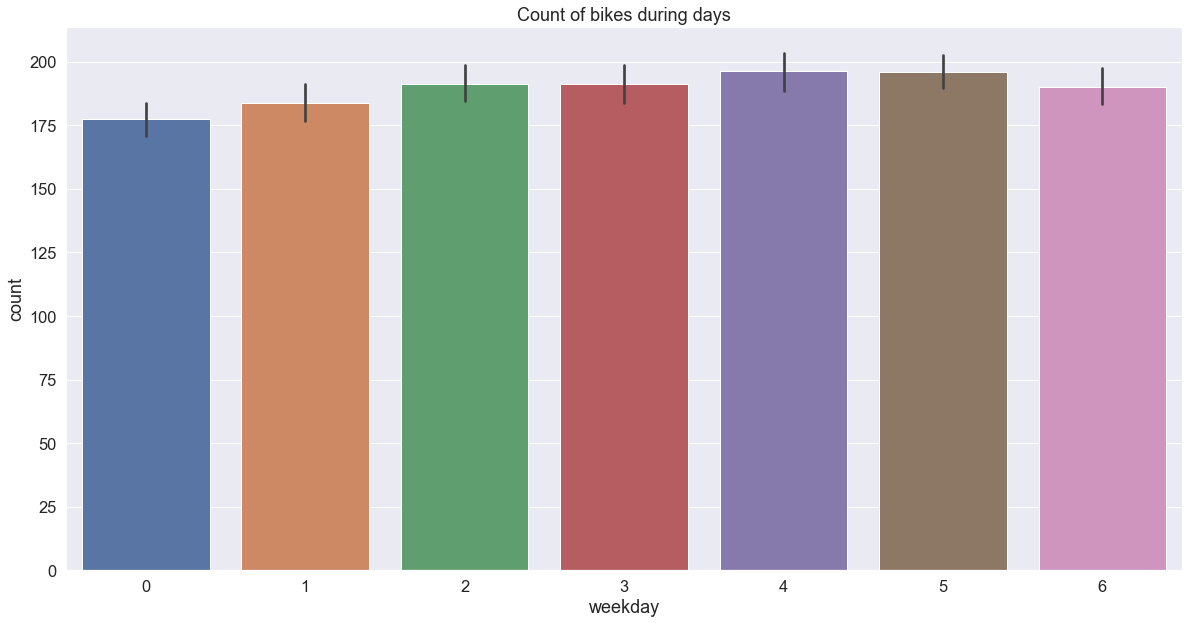

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=copy_result,x='weekday',y='count',ax=ax)
ax.set(title='Count of bikes during days')

In [59]:
marioma = copy_result.groupby(['weekday'])['count'].count().reset_index()
marioma

weekday  count
0        0   2502
1        1   2479
2        2   2453
3        3   2475
4        4   2471
5        5   2487
6        6   2512

In [60]:
fig = px.bar(marioma,x='weekday',y='count')
fig.show()

# -Solving the outliers

In [40]:
from datasist.structdata import detect_outliers

- Detect outliers

In [42]:
idx = detect_outliers(copy_result, 0, ['temp','atemp','humidity','windspeed'])
idx

[1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 175,
 178,
 194,
 196,
 265,
 271,
 467,
 468,
 469,
 728,
 729,
 730,
 731,
 736,
 861,
 862,
 863,
 865,
 869,
 870,
 962,
 1006,
 1007,
 1009,
 1010,
 1011,
 1013,
 1014,
 1015,
 1017,
 1018,
 1019,
 1105,
 1107,
 1110,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1130,
 1131,
 1132,
 1136,
 1137,
 1138,
 1258,
 1259,
 1261,
 1262,
 1264,
 1323,
 1332,
 1333,
 1379,
 1380,
 1383,
 1384,
 1389,
 1475,
 1477,
 1482,
 1483,
 1611,
 1767,
 1773,
 1873,
 2124,
 2153,
 2154,
 2155,
 2156,
 2157,
 2159,
 2167,
 2171,
 2172,
 2177,
 2181,
 2184,
 2200,
 2321,
 2322,
 2323,
 2326,
 2339,
 2345,
 2418,
 2438,
 2439,
 2440,
 2441,
 2443,
 2465,
 2551,
 2552,
 2554,
 2705,
 2846,
 2847,
 2848,
 2861,
 2895,
 2897,
 3328,
 3564,
 3570,
 3571,
 3821,
 4315,
 4316,
 4523,
 5048,
 5155,
 5327,
 5328,
 5443,
 5444,

In [44]:
# el data set el cleeeaaannnnnnnn
# drop indexes of outlires

outliers = copy_result.loc[idx] 
clean = copy_result.drop(idx, axis=0)

clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17016 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17016 non-null  object 
 1   year        17016 non-null  int64  
 2   month       17016 non-null  int64  
 3   hour        17016 non-null  object 
 4   holiday     17016 non-null  object 
 5   weekday     17016 non-null  int64  
 6   workingday  17016 non-null  object 
 7   weather     17016 non-null  object 
 8   temp        17016 non-null  float64
 9   atemp       17016 non-null  float64
 10  humidity    17016 non-null  float64
 11  windspeed   17016 non-null  float64
 12  casual      17016 non-null  int64  
 13  registered  17016 non-null  int64  
 14  count       17016 non-null  int64  
 15  day         17016 non-null  int64  
 16  dayofweek   17016 non-null  int64  
 17  hours       17016 non-null  int64  
dtypes: float64(4), int64(9), object(5)
memory usage: 2.5+ MB


In [45]:
clean.describe()

year         month       weekday          temp         atemp  \
count  17016.000000  17016.000000  17016.000000  17016.000000  17016.000000   
mean    2011.502997      6.572873      2.998002      0.498235      0.477199   
std        0.500006      3.427822      2.005194      0.192770      0.171556   
min     2011.000000      1.000000      0.000000      0.020000      0.000000   
25%     2011.000000      4.000000      1.000000      0.340000      0.333300   
50%     2012.000000      7.000000      3.000000      0.500000      0.484800   
75%     2012.000000     10.000000      5.000000      0.660000      0.621200   
max     2012.000000     12.000000      6.000000      1.000000      1.000000   

           humidity     windspeed        casual    registered         count  \
count  17016.000000  17016.000000  17016.000000  17016.000000  17016.000000   
mean       0.630960      0.182814     35.784262    154.048895    189.833157   
std        0.190498      0.112016     49.419374    151.680591    181.762553   
min        0.080000      0.000000      0.000000      0.000000      1.000000   
25%        0.480000      0.104500      4.000000     34.000000     40.000000   
50%        0.635000      0.164200     17.000000    116.000000    142.000000   
75%        0.790000      0.253700     48.250000    221.000000    282.000000   
max        1.000000      0.462700    367.000000    886.000000    977.000000   

                day     dayofweek    hours  
count  17016.000000  17016.000000  17016.0  
mean      15.698754      3.010813      0.0  
std        8.797356      2.002966      0.0  
min        1.000000      0.000000      0.0  
25%        8.000000      1.000000      0.0  
50%       16.000000      3.000000      0.0  
75%       23.000000      5.000000      0.0  
max       31.000000      6.000000      0.0

# one hot encoding

In [ ]:
pd.get_dummies(copy_result['season'],prefix='season')

In [ ]:
df_OHE = copy_result

def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
    data=data.drop([column],axis=1)
    return data

cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    df_OHE = one_hot_encoding(df_OHE,col)
# to see the changes
df_OHE.info()

In [ ]:
df_OHE.head()

In [61]:
# write the result to a new CSV file
clean.to_csv('newrResultBikeSharing.csv')